소프트맥스 회귀(Softmax Regression) [Reference](https://wikidocs.net/35476)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


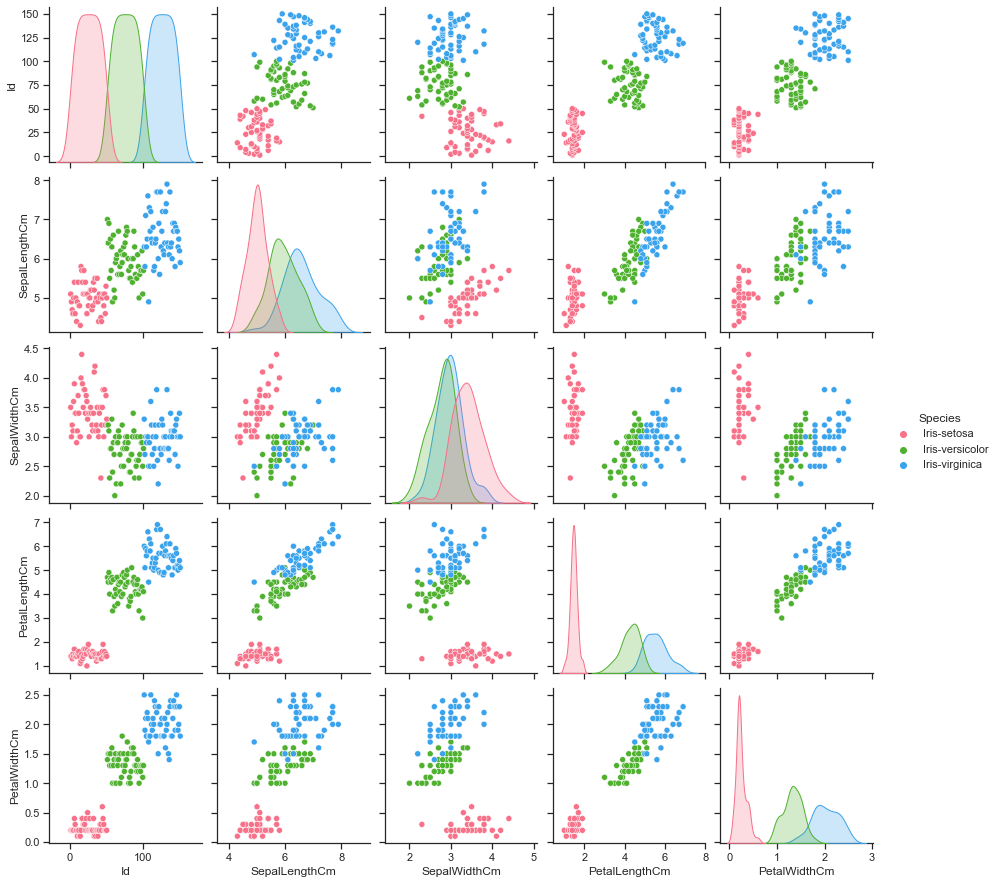

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

C:\Users\HyunSeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

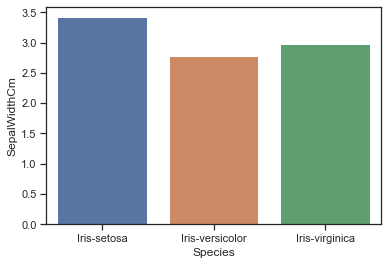

In [5]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

<AxesSubplot:>

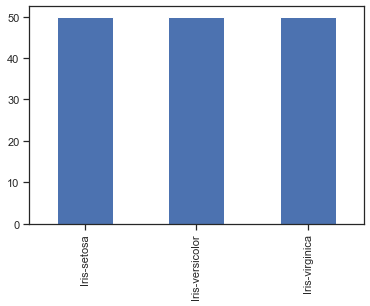

In [6]:
data['Species'].value_counts().plot(kind='bar')

<AxesSubplot:>

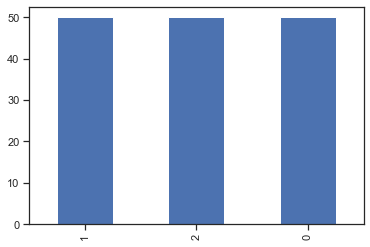

In [7]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [8]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [9]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 2ms/step - loss: 0.7596 - accuracy: 0.6917 - val_loss: 0.7561 - val_accuracy: 0.5667
Epoch 2/200
120/120 [==============================] - 0s 821us/step - loss: 0.6236 - accuracy: 0.6833 - val_loss: 0.6379 - val_accuracy: 0.5667
Epoch 3/200
120/120 [==============================] - 0s 863us/step - loss: 0.6043 - accuracy: 0.6250 - val_loss: 0.6061 - val_accuracy: 0.5667
Epoch 4/200
120/120 [==============================] - 0s 863us/step - loss: 0.5955 - accuracy: 0.6083 - val_loss: 0.5885 - val_accuracy: 0.5333
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.6250 - val_loss: 0.5861 - val_accuracy: 0.5667
Epoch 6/200
120/120 [==============================] - 0s 858us/step - loss: 0.5730 - accuracy: 0.6333 - val_loss: 0.5745 - val_accuracy: 0.5667
Epoch 7/200
120/120 [==============================] - 0s 727us/step - loss: 0.5662 - accuracy: 0.6083 - val_loss: 0.5631 - val_accura

120/120 [==============================] - 0s 682us/step - loss: 0.3464 - accuracy: 0.9167 - val_loss: 0.3709 - val_accuracy: 0.8333
Epoch 58/200
120/120 [==============================] - 0s 678us/step - loss: 0.3424 - accuracy: 0.9500 - val_loss: 0.3737 - val_accuracy: 0.8333
Epoch 59/200
120/120 [==============================] - 0s 682us/step - loss: 0.3402 - accuracy: 0.9167 - val_loss: 0.3660 - val_accuracy: 0.8333
Epoch 60/200
120/120 [==============================] - 0s 680us/step - loss: 0.3365 - accuracy: 0.9417 - val_loss: 0.3700 - val_accuracy: 0.8333
Epoch 61/200
120/120 [==============================] - 0s 733us/step - loss: 0.3379 - accuracy: 0.9333 - val_loss: 0.3751 - val_accuracy: 0.8000
Epoch 62/200
120/120 [==============================] - 0s 684us/step - loss: 0.3357 - accuracy: 0.8917 - val_loss: 0.3505 - val_accuracy: 0.8333
Epoch 63/200
120/120 [==============================] - 0s 741us/step - loss: 0.3311 - accuracy: 0.9500 - val_loss: 0.3572 - val_accuracy

120/120 [==============================] - 0s 699us/step - loss: 0.2350 - accuracy: 0.9667 - val_loss: 0.2630 - val_accuracy: 1.0000
Epoch 114/200
120/120 [==============================] - 0s 712us/step - loss: 0.2315 - accuracy: 0.9667 - val_loss: 0.2771 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 0s 796us/step - loss: 0.2298 - accuracy: 0.9667 - val_loss: 0.2693 - val_accuracy: 0.9333
Epoch 116/200
120/120 [==============================] - 0s 796us/step - loss: 0.2292 - accuracy: 0.9667 - val_loss: 0.2700 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 0s 913us/step - loss: 0.2271 - accuracy: 0.9667 - val_loss: 0.2606 - val_accuracy: 1.0000
Epoch 118/200
120/120 [==============================] - 0s 713us/step - loss: 0.2258 - accuracy: 0.9667 - val_loss: 0.2699 - val_accuracy: 0.9333
Epoch 119/200
120/120 [==============================] - 0s 880us/step - loss: 0.2265 - accuracy: 0.9750 - val_loss: 0.2567 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 788us/step - loss: 0.1735 - accuracy: 0.9750 - val_loss: 0.2120 - val_accuracy: 1.0000
Epoch 170/200
120/120 [==============================] - 0s 779us/step - loss: 0.1728 - accuracy: 0.9750 - val_loss: 0.2130 - val_accuracy: 1.0000
Epoch 171/200
120/120 [==============================] - 0s 771us/step - loss: 0.1724 - accuracy: 0.9750 - val_loss: 0.2043 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - 0s 853us/step - loss: 0.1735 - accuracy: 0.9667 - val_loss: 0.2069 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 796us/step - loss: 0.1717 - accuracy: 0.9667 - val_loss: 0.2044 - val_accuracy: 1.0000
Epoch 174/200
120/120 [==============================] - 0s 863us/step - loss: 0.1706 - accuracy: 0.9750 - val_loss: 0.2069 - val_accuracy: 1.0000
Epoch 175/200
120/120 [==============================] - 0s 972us/step - loss: 0.1695 - accuracy: 0.9667 - val_loss: 0

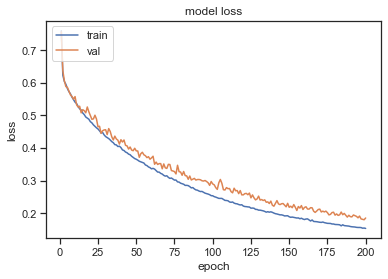

In [11]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 104ms/step - loss: 0.1859 - accuracy: 1.0000

 테스트 정확도: 1.0000
